The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Ticker: COO
[*********************100%***********************]  1 of 1 completed
5 buy/sells performed - 0.08795074758135445% of the time
Stock price change: 992.3389499470339%
Total gain/loss: 0.0%
{'cash': 10000.0, 'assets': 0, 'latest_price': 317.0299987792969, 'total_value': 10000.0}


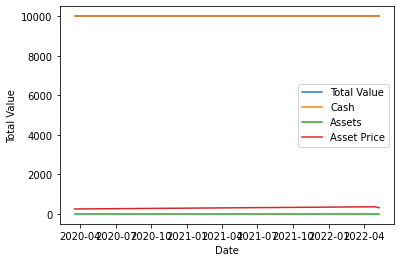

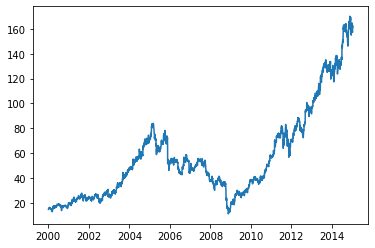

Ticker: CDNS
[*********************100%***********************]  1 of 1 completed
0 buy/sells performed - 0.0% of the time
Stock price change: -16.46458785189448%
Exception:
list index out of range
Ticker: LUV
[*********************100%***********************]  1 of 1 completed
24 buy/sells performed - 0.4221635883905013% of the time
Stock price change: 282.48819613984466%
Total gain/loss: 0.0%
{'cash': 9958.509998321533, 'assets': 1, 'latest_price': 41.4900016784668, 'total_value': 10000.0}


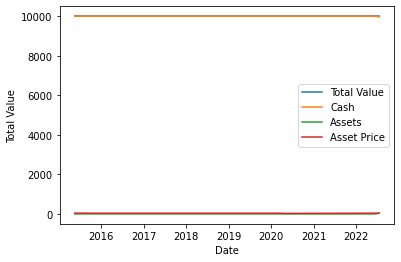

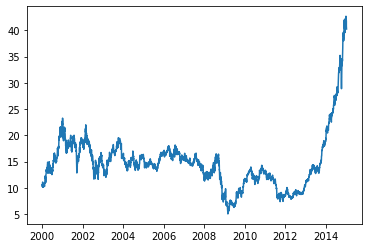

Ticker: LEG
[*********************100%***********************]  1 of 1 completed
42 buy/sells performed - 0.7387862796833773% of the time
Stock price change: 116.75379790795972%
Total gain/loss: 0.05759988784790039%
{'cash': 9705.249994277954, 'assets': 9, 'latest_price': 33.38999938964844, 'total_value': 10005.75998878479}


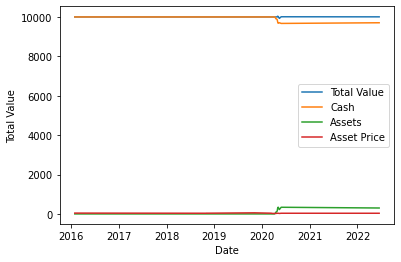

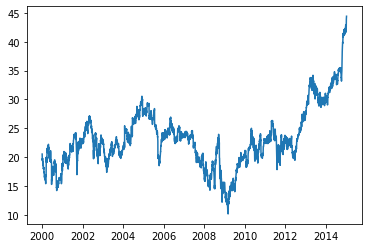

Ticker: JKHY
[*********************100%***********************]  1 of 1 completed
2 buy/sells performed - 0.03518029903254178% of the time
Stock price change: 372.6325456486192%
Total gain/loss: 0.0%
{'cash': 10000.0, 'assets': 0, 'latest_price': 167.25999450683594, 'total_value': 10000.0}


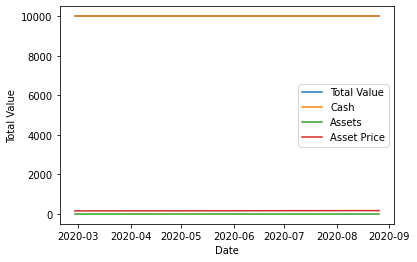

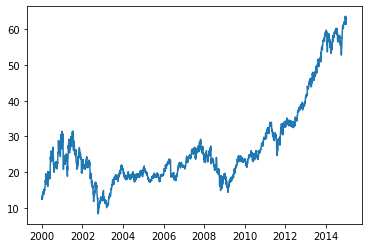

Ticker: XLNX
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- XLNX: No data found, symbol may be delisted
Exception:
'date'
Ticker: A
[*********************100%***********************]  1 of 1 completed
0 buy/sells performed - 0.0% of the time
Stock price change: -23.20708742677105%
Exception:
list index out of range
Ticker: LH
[*********************100%***********************]  1 of 1 completed
17 buy/sells performed - 0.2990325417766051% of the time
Stock price change: 1178.4551791487067%
Total gain/loss: 8.006500091552734%
{'cash': 8662.050003051758, 'assets': 10, 'latest_price': 213.86000061035156, 'total_value': 10800.650009155273}


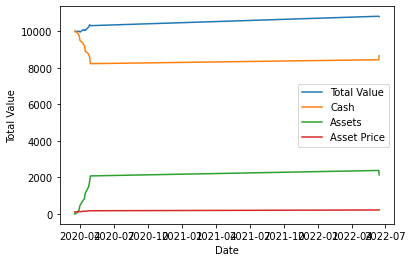

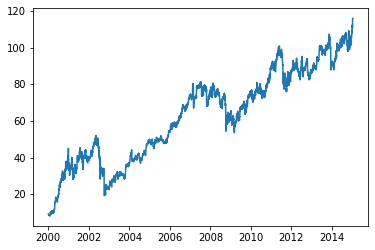

Ticker: ANSS
[*********************100%***********************]  1 of 1 completed
9 buy/sells performed - 0.15831134564643798% of the time
Stock price change: 2815.434928937147%
Total gain/loss: 0.0%
{'cash': 10000.0, 'assets': 0, 'latest_price': 353.6099853515625, 'total_value': 10000.0}


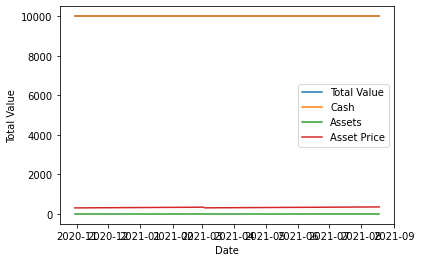

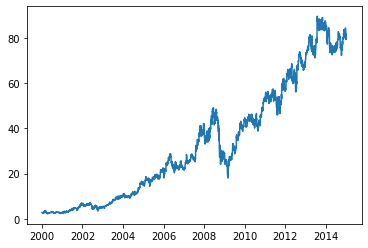

Ticker: FRC
[*********************100%***********************]  1 of 1 completed
0 buy/sells performed - 0.0% of the time
Exception:
single positional indexer is out-of-bounds
Ticker: HPQ
[*********************100%***********************]  1 of 1 completed
19 buy/sells performed - 0.33421284080914687% of the time
Stock price change: -32.202234849774506%
Total gain/loss: 0.8298999309539794%
{'cash': 10050.279994010925, 'assets': 1, 'latest_price': 32.709999084472656, 'total_value': 10082.989993095398}


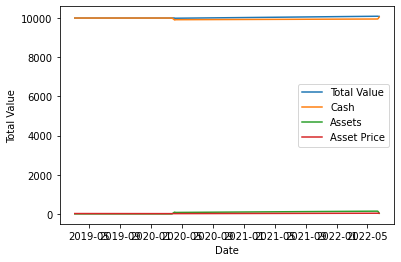

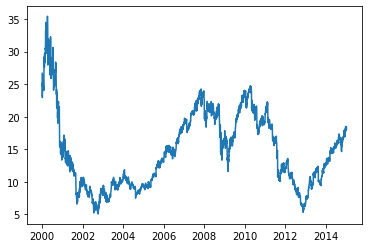

Ticker: CZR
[*********************100%***********************]  1 of 1 completed
0 buy/sells performed - 0.0% of the time
Exception:
single positional indexer is out-of-bounds
Ticker: DHR
[*********************100%***********************]  1 of 1 completed
6 buy/sells performed - 0.10554089709762532% of the time
Stock price change: 625.5914358728703%
Total gain/loss: 1.1827000427246093%
{'cash': 9243.860000610352, 'assets': 3, 'latest_price': 291.4700012207031, 'total_value': 10118.270004272461}


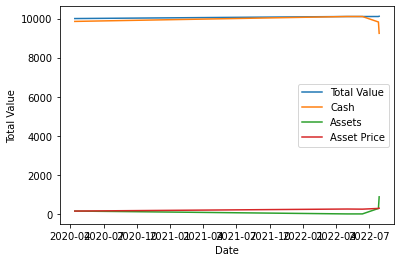

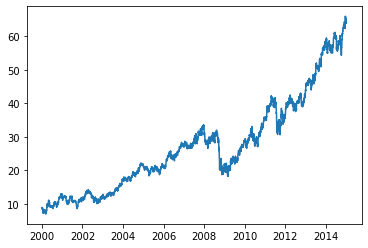

Ticker: WY
[*********************100%***********************]  1 of 1 completed
25 buy/sells performed - 0.43975373790677225% of the time
Stock price change: -47.49195187590843%
Total gain/loss: 1.6249000358581542%
{'cash': 9736.479997634888, 'assets': 13, 'latest_price': 32.77000045776367, 'total_value': 10162.490003585815}


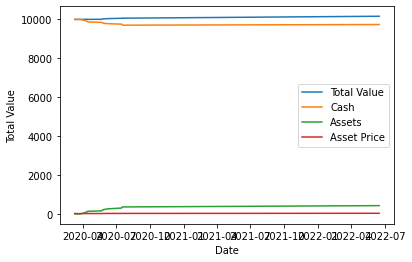

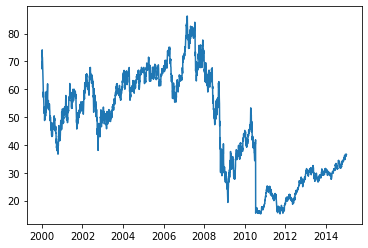

Ticker: RCL
[*********************100%***********************]  1 of 1 completed
68 buy/sells performed - 1.1961301671064204% of the time
Stock price change: 79.55794424380896%
Total gain/loss: -3.360100345611573%
{'cash': 8992.589979171753, 'assets': 18, 'latest_price': 37.29999923706055, 'total_value': 9663.989965438843}


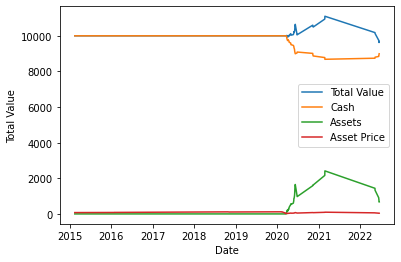

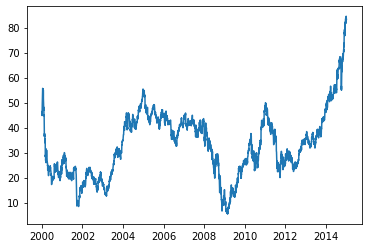

Ticker: AKAM
[*********************100%***********************]  1 of 1 completed
0 buy/sells performed - 0.0% of the time
Stock price change: -81.07704251656736%
Exception:
list index out of range
Ticker: MRNA
[*********************100%***********************]  1 of 1 completed
0 buy/sells performed - 0.0% of the time
Exception:
single positional indexer is out-of-bounds
Ticker: NFLX
[*********************100%***********************]  1 of 1 completed
16 buy/sells performed - 0.31452722626302343% of the time
Stock price change: 13542.263709981313%
Total gain/loss: -0.07300018310546875%
{'cash': 9337.169998168945, 'assets': 3, 'latest_price': 218.50999450683594, 'total_value': 9992.699981689453}


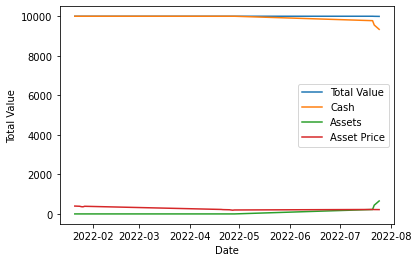

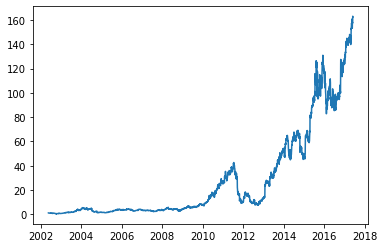

Ticker: AJG
[*********************100%***********************]  1 of 1 completed


In [ ]:
# Auto reload local files
%load_ext autoreload
%autoreload 2
# Make files in src/ available to notebook
import sys
if 'src' not in sys.path:
    sys.path.insert(0, 'src')


import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from technical_signals import TechnicalSignals, percent_change
import datastore as ds
import backtest as bt

# XXX NOTE VERY IMPORTANT
# THIS FILTERS ALL WARNINGS - ta library is giving annoying warnings. REMOVE before modifying any bt code
import warnings
warnings.filterwarnings('ignore')

spy_constituents = list(pd.read_csv('../../data/spy_constituents.csv', header=0)['Symbol'])
random.shuffle(spy_constituents)
    
predictions = {}
for ticker in spy_constituents:
    try:
        """ TODO tune XGBoost
        import xgboost as xgb
        # read in data
        dtrain = xgb.DMatrix('demo/data/agaricus.txt.train')
        dtest = xgb.DMatrix('demo/data/agaricus.txt.test')
        # specify parameters via map
        param = {'max_depth':2, 'eta':1, 'objective':'binary:logistic' }
        num_round = 2
        bst = xgb.train(param, dtrain, num_round)
        # make prediction
        preds = bst.predict(dtest)
        """
        print('Ticker:', ticker)
        # Download data
        ds.download_daily_candlesticks([ticker], "2000-01-01", "2023-05-07")
        # Load data
        data = ds.get_daily_candlesticks([ticker], "2000-01-01", "2023-06-06")[ticker]
        # Run strategy
        skip_index = 252*15
        strategy = bt.TechnicalIndicatorsModelStrategy(RandomForestRegressor(), cutoff=2., pretrain_df=data)
        actions = bt.backtest(strategy, data, skip_index=skip_index, processes=10)
        # Print results
        #print(actions)
        start_cash = 10000.0
        print(f"{len(actions)} buy/sells performed - {len(actions) / len(data.index) * 100}% of the time")
        bt_results = bt.track_balance(start_cash, actions)
        price_change = (data.iloc[skip_index]["close"] - data.iloc[0]["close"]) / data.iloc[0]["close"] * 100
        print(f"Stock price change: {price_change}%")
        final_result = bt_results[list(bt_results.keys())[-1]]
        gain_loss = (final_result["total_value"] - start_cash) / start_cash * 100
        print(f"Total gain/loss: {gain_loss}%")
        print(final_result)
        bt.plot_backtest(bt_results)
        plt.plot(data.iloc[:skip_index]["date"], data.iloc[:skip_index]["close"])
        plt.show()
    except Exception as ex:
        print("Exception:")
        print(ex)